# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pickle
import numpy as np
from google.colab import files

import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# load weight mats

In [ ]:
file_path = '/content/drive/MyDrive/ts-1L-21M_Wdec.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_1L_16384 = pickle.load(f)
print(weight_matrix_1L_16384.shape)
weight_matrix_1L_16384 = weight_matrix_1L_16384.detach().numpy()

torch.Size([16384, 1024])


In [56]:
file_path = '/content/drive/MyDrive/ts-2L-33M_Wdec.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_2L_16384 = pickle.load(f)
print(weight_matrix_2L_16384.shape)
weight_matrix_2L_16384 = weight_matrix_2L_16384.detach().numpy()

torch.Size([16384, 1024])


In [ ]:
file_path = '/content/drive/MyDrive/ts_1L_21M_Wdec_df32768.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_1L_32768 = pickle.load(f)
print(weight_matrix_1L_32768.shape)
weight_matrix_1L_32768 = weight_matrix_1L_32768.detach().numpy()

torch.Size([32768, 1024])


In [ ]:
file_path = '/content/drive/MyDrive/ts_2L_33M_Wdec_df32768.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_2L_32768 = pickle.load(f)
print(weight_matrix_2L_32768.shape)
weight_matrix_2L_32768 = weight_matrix_2L_32768.detach().numpy()

torch.Size([32768, 1024])


# umap

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')

# Fit and transform the data by rows
embedding_1_16384_32768 = reducer.fit_transform(weight_matrix_1L_16384)
embedding_2_16384_32768 = reducer.fit_transform(weight_matrix_2L_16384)
embedding_3_16384_32768 = reducer.fit_transform(weight_matrix_1L_32768)
embedding_4_16384_32768 = reducer.fit_transform(weight_matrix_2L_32768)

In [ ]:
# with open('embedding_1_16384_32768.pkl', 'wb') as f:
#     pickle.dump(embedding_1_16384_32768, f)
# files.download('embedding_1_16384_32768.pkl')

# with open('embedding_2_16384_32768.pkl', 'wb') as f:
#     pickle.dump(embedding_2_16384_32768, f)
# files.download('embedding_2_16384_32768.pkl')

# with open('embedding_3_16384_32768.pkl', 'wb') as f:
#     pickle.dump(embedding_3_16384_32768, f)
# files.download('embedding_3_16384_32768.pkl')

# with open('embedding_4_16384_32768.pkl', 'wb') as f:
#     pickle.dump(embedding_4_16384_32768, f)
# files.download('embedding_4_16384_32768.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

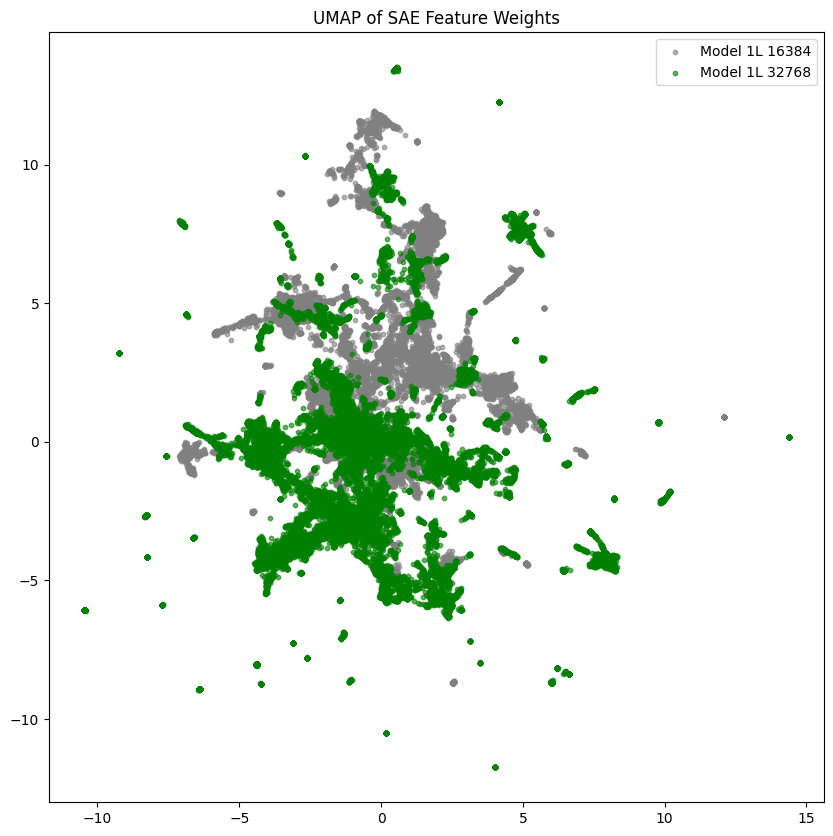

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(embedding_1_16384_32768[:, 0], embedding_1_16384_32768[:, 1], s=10, label='Model 1L 16384', c='gray', alpha=0.6)
plt.scatter(embedding_3_16384_32768[:, 0], embedding_3_16384_32768[:, 1], s=10, label='Model 1L 32768', c='green', alpha=0.6)
plt.legend()
plt.title('UMAP of SAE Feature Weights')
plt.show()

# load umap embeddings

In [ ]:
# with open('embedding_1L_16384.pkl', 'rb') as f:
#     embedding_1_16384 = pickle.load(f)
# with open('embedding_2L_16384.pkl', 'rb') as f:
#     embedding_2_16384 = pickle.load(f)

# with open('embedding_1L_32768.pkl', 'rb') as f:
#     embedding_1_32768 = pickle.load(f)
# with open('embedding_2L_32768.pkl', 'rb') as f:
#     embedding_2_32768 = pickle.load(f)

# 1 LLM, 2 SAEs diff sizes

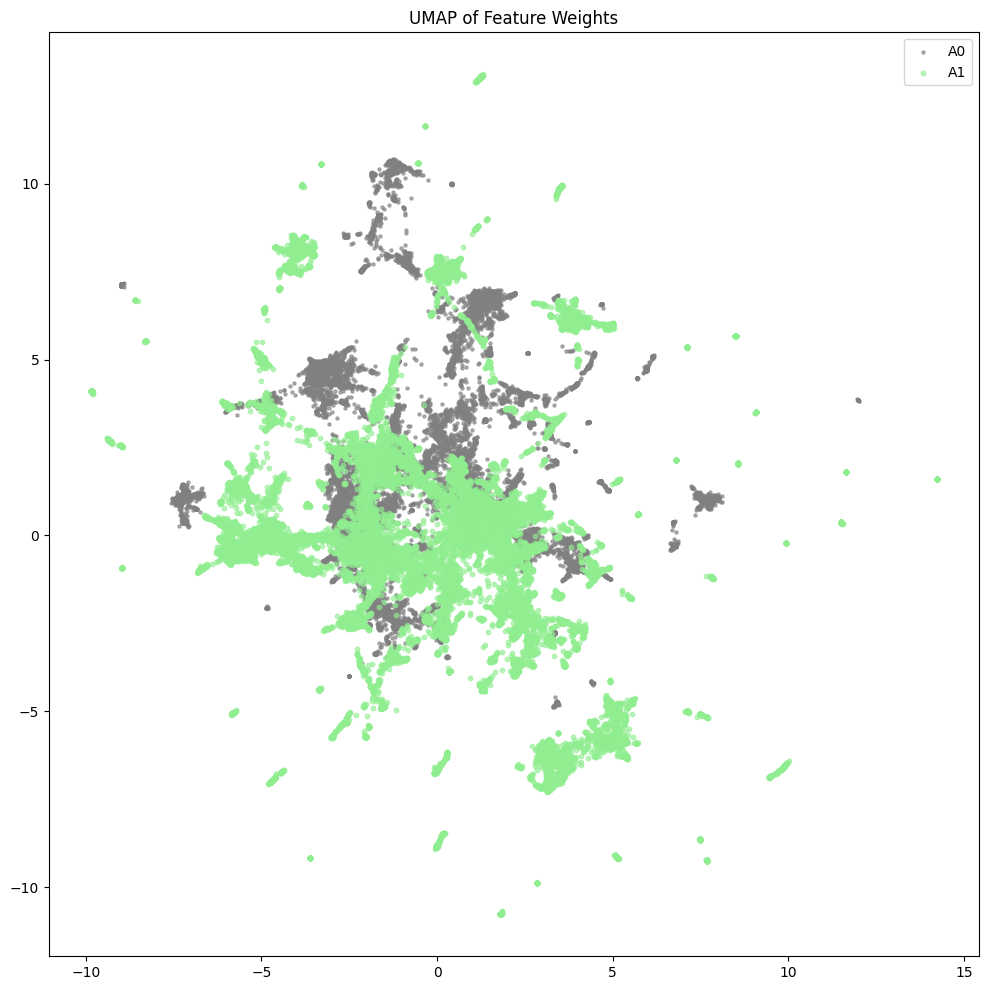

In [ ]:
# # Combine embeddings into a single dataframe for plotting
# embedding_A0_df = pd.DataFrame(embedding_1L_16384, columns=['x', 'y'])
# embedding_A0_df['stage'] = 'A0'

# embedding_A1_df = pd.DataFrame(embedding_1L_32768, columns=['x', 'y'])
# embedding_A1_df['stage'] = 'A1'

# combined_df = pd.concat([embedding_A0_df, embedding_A1_df])

# # Plotting
# fig, ax = plt.subplots(figsize=(12, 12))

# # Plot smaller SAEs first
# for stage, color in [('A0', 'gray'), ('A1', 'lightgreen')]:
#     subset = combined_df[combined_df['stage'] == stage]
#     ax.scatter(subset['x'], subset['y'], label=stage, alpha=0.6, s=10 if stage == 'A1' else 5, c=color)

# ax.legend()
# ax.set_title('UMAP of Feature Weights')
# plt.show()

# load feature labels

In [ ]:
import json
with open('feature_top_samps_lst_1L_16k.json', 'rb') as f:
    feat_snip_dict = json.load(f)

In [ ]:
with open('feature_top_samps_lst_1L_32k.json', 'rb') as f:
    feat_snip_dict_2 = json.load(f)

In [ ]:
import re

def extract_tagged_word(s):
    # Define the regex pattern to match the tagged word
    pattern = r'\[bold u dark_orange\](.*?)\[/\]'

    # Search for the pattern in the string
    match = re.search(pattern, s)

    # If a match is found, return the captured group (the word inside the tags)
    if match:
        return match.group(1)
    else:
        return None

In [ ]:
fList_model_A = []
for feat_dict in feat_snip_dict:
    # text = feat_dict['strings'][0]
    # result = extract_tagged_word(text)
    # fList_model_A.append(result)
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_A.append(out_str)

In [ ]:
fList_model_B = []
for feat_dict in feat_snip_dict_2:
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_B.append(out_str)

# interactive umap

In [ ]:
# Create DataFrames for each embedding
df_A0 = pd.DataFrame(embedding_1_16384_32768, columns=['UMAP Component 1', 'UMAP Component 2'])
df_A0['Feature ID'] = range(len(fList_model_A))
df_A0['Feature Description'] = fList_model_A
df_A0['Run'] = 'Run A/0'

df_A1 = pd.DataFrame(embedding_3_16384_32768, columns=['UMAP Component 1', 'UMAP Component 2'])
df_A1['Feature ID'] = range(len(fList_model_B))
df_A1['Feature Description'] = fList_model_B
df_A1['Run'] = 'Run A/1'

# Combine the DataFrames
df_combined = pd.concat([df_A0, df_A1])

# Plot using Plotly
fig = px.scatter(df_combined, x='UMAP Component 1', y='UMAP Component 2', color='Run', text='Feature ID')

# Customize hover information
fig.update_traces(
    hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}<br><b>Run:</b> %{customdata[1]}',
    customdata=np.array(df_combined[['Feature Description', 'Run']])
)

fig.update_layout(
    title='UMAP of Decoder Weights',
    xaxis_title='UMAP Component 1',
    yaxis_title='UMAP Component 2'
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# umap combined data

In [ ]:
# combined_data = np.vstack((weight_matrix_1L_16384, data2, data3))
combined_data = np.vstack((weight_matrix_1L_16384, weight_matrix_1L_32768))

# Create and fit UMAP reducer on combined dataset with a fixed random seed
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean', random_state=42)
reducer.fit(combined_data)

# Transform each dataset using the same reducer
embedding_1_16384_32768 = reducer.transform(weight_matrix_1L_16384)
# embedding_2_16384_32768 = reducer.transform(weight_matrix_2L_16384)
embedding_3_16384_32768 = reducer.transform(weight_matrix_1L_32768)
# embedding_4_16384_32768 = reducer.transform(weight_matrix_2L_32768)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
weight_matrix_1L_16384.shape

(16384, 1024)

In [ ]:
combined_data.shape

(49152, 1024)

In [ ]:
# Create DataFrames for each embedding
df_A0 = pd.DataFrame(embedding_1_16384_32768, columns=['UMAP Component 1', 'UMAP Component 2'])
df_A0['Feature ID'] = range(len(fList_model_A))
df_A0['Feature Description'] = fList_model_A
df_A0['Run'] = 'Run A/0'

df_A1 = pd.DataFrame(embedding_3_16384_32768, columns=['UMAP Component 1', 'UMAP Component 2'])
df_A1['Feature ID'] = range(len(fList_model_B))
df_A1['Feature Description'] = fList_model_B
df_A1['Run'] = 'Run A/1'

# Combine the DataFrames
df_combined = pd.concat([df_A0, df_A1])

# Plot using Plotly
fig = px.scatter(df_combined, x='UMAP Component 1', y='UMAP Component 2', color='Run', text='Feature ID')

# Customize hover information
fig.update_traces(
    hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}<br><b>Run:</b> %{customdata[1]}',
    customdata=np.array(df_combined[['Feature Description', 'Run']])
)

fig.update_layout(
    title='UMAP of Decoder Weights',
    xaxis_title='UMAP Component 1',
    yaxis_title='UMAP Component 2'
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# load sae f actvs

In [ ]:
file_path = '/content/drive/MyDrive/fActs_ts_1L_21M_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_A = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/fActs_ts_1L_21M_anySamps__df-32768_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_B = pickle.load(f)

In [ ]:
feature_acts_model_B.shape

torch.Size([500, 128, 32768])

In [ ]:
first_dim_reshaped = feature_acts_model_A.shape[0] * feature_acts_model_A.shape[1]
reshaped_activations_A = feature_acts_model_A.reshape(first_dim_reshaped, feature_acts_model_A.shape[-1]).cpu()
reshaped_activations_B = feature_acts_model_B.reshape(first_dim_reshaped, feature_acts_model_B.shape[-1]).cpu()

In [ ]:
reshaped_activations_A.shape

torch.Size([64000, 16384])

In [ ]:
reshaped_activations_B.shape

torch.Size([64000, 32768])

# corr between fs saes

In [ ]:
import torch

def find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B, batch_size=1024):
    # Ensure tensors are on GPU
    if torch.cuda.is_available():
        reshaped_activations_A = reshaped_activations_A.to('cuda', dtype=torch.float16)
        reshaped_activations_B = reshaped_activations_B.to('cuda', dtype=torch.float16)

    # Normalize columns of A
    mean_A = reshaped_activations_A.mean(dim=0, keepdim=True)
    std_A = reshaped_activations_A.std(dim=0, keepdim=True)
    normalized_A = (reshaped_activations_A - mean_A) / (std_A + 1e-8)  # Avoid division by zero

    # Normalize columns of B
    mean_B = reshaped_activations_B.mean(dim=0, keepdim=True)
    std_B = reshaped_activations_B.std(dim=0, keepdim=True)
    normalized_B = (reshaped_activations_B - mean_B) / (std_B + 1e-8)  # Avoid division by zero

    # Determine the number of batches
    num_batches = (normalized_A.shape[1] + batch_size - 1) // batch_size  # Round up division

    highest_correlations_values = torch.full((normalized_B.shape[1],), float('-inf'), device=normalized_B.device, dtype=torch.float16)
    highest_correlations_indices = torch.full((normalized_B.shape[1],), -1, device=normalized_B.device, dtype=torch.long)

    # Process in batches
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, normalized_A.shape[1])

        # Compute the correlation for the current batch
        correlation_matrix_batch = torch.matmul(normalized_A[:, start_idx:end_idx].t(), normalized_B) / normalized_A.shape[0]

        # Handle NaNs by setting them to -inf
        correlation_matrix_batch = torch.where(torch.isnan(correlation_matrix_batch), torch.tensor(float('-inf')).to(correlation_matrix_batch.device), correlation_matrix_batch)

        # Compare and update the highest correlation values and indices
        batch_values, batch_indices = correlation_matrix_batch.max(dim=0)
        mask = batch_values > highest_correlations_values
        highest_correlations_values[mask] = batch_values[mask]
        highest_correlations_indices[mask] = batch_indices[mask] + start_idx

    # Move results back to CPU
    highest_correlations_indices = highest_correlations_indices.cpu().numpy()
    highest_correlations_values = highest_correlations_values.cpu().numpy()

    return highest_correlations_indices, highest_correlations_values


In [ ]:
highest_correlations_indices, highest_correlations_values = find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B)
print(f'Highest correlations indices: {len(highest_correlations_indices)}')
print(f'Highest correlations values: {len(highest_correlations_values)}')

Highest correlations indices: 32768
Highest correlations values: 32768


# load tokenizer

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer for the specified model
tokenizer = AutoTokenizer.from_pretrained("roneneldan/TinyStories-1Layer-21M")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

# interpret paired features

## load dataset tokens

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/batch_tokens_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    batch_tokens = pickle.load(f)

## interpret

In [ ]:
%pip install jaxtyping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn, Tensor
from jaxtyping import Float, Int
from typing import Optional, Callable, Union, List, Tuple

In [ ]:
def highest_activating_tokens(
    feature_acts,
    feature_idx: int,
    k: int = 10,  # num batch_seq samples
    batch_tokens=None
) -> Tuple[Int[Tensor, "k 2"], Float[Tensor, "k"]]:
    '''
    Returns the indices & values for the highest-activating tokens in the given batch of data.
    '''
    batch_size, seq_len = batch_tokens.shape

    # Get the top k largest activations for only targeted feature
    # need to flatten (batch,seq) into batch*seq first because it's ANY batch_seq, even if in same batch or same pos
    flattened_feature_acts = feature_acts[:, :, feature_idx].reshape(-1)
    # flattened_feature_acts = feature_acts[:, feature_idx]

    top_acts_values, top_acts_indices = flattened_feature_acts.topk(k)
    # top_acts_values should be 1D
    # top_acts_indices should be also be 1D. Now, turn it back to 2D
    # Convert the indices into (batch, seq) indices
    top_acts_batch = top_acts_indices // seq_len
    top_acts_seq = top_acts_indices % seq_len

    return torch.stack([top_acts_batch, top_acts_seq], dim=-1), top_acts_values

In [ ]:
from rich import print as rprint
def display_top_sequences(top_acts_indices, top_acts_values, batch_tokens):
    s = ""
    for (batch_idx, seq_idx), value in zip(top_acts_indices, top_acts_values):
        # s += f'{batch_idx}\n'
        s += f'batchID: {batch_idx}, '
        # Get the sequence as a string (with some padding on either side of our sequence)
        seq_start = max(seq_idx - 5, 0)
        seq_end = min(seq_idx + 5, batch_tokens.shape[1])
        seq = ""
        # Loop over the sequence, adding each token to the string (highlighting the token with the large activations)
        for i in range(seq_start, seq_end):
            # new_str_token = model.to_single_str_token(batch_tokens[batch_idx, i].item()).replace("\n", "\\n").replace("<|BOS|>", "|BOS|")
            new_str_token = tokenizer.decode([batch_tokens[batch_idx, i].item()]).replace("\n", "\\n").replace("<|BOS|>", "|BOS|")
            if i == seq_idx:
                new_str_token = f"[bold u dark_orange]{new_str_token}[/]"
            seq += new_str_token
        # Print the sequence, and the activation value
        s += f'Act = {value:.2f}, Seq = "{seq}"\n'

    rprint(s)

In [ ]:
samp_m = 5 # get top samp_m tokens for all top feat_k feature neurons

for feature_idx_B, feature_idx_A in enumerate(highest_correlations_indices[:5]):
    print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print('Model A Feature: ', feature_idx_A)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('Model B Feature: ', feature_idx_B)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_B, feature_idx_B, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_B, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('-'*50)

Correlation: 0.52099609375
Model A Feature:  8650


batchID: 339, Act = 2.99, Seq = " their ice cream. They hugged Mom and Dad."
batchID: 267, Act = 2.29, Seq = " to the plant. They hugged and said, ""
batchID: 8, Act = 2.19, Seq = ". They hugged and went back home"
batchID: 209, Act = 2.18, Seq = " was so happy and she hugged her teddy bear"
batchID: 261, Act = 1.97, Seq = " Ben love it. They hug it and play with"

Model B Feature:  0


batchID: 8, Act = 2.09, Seq = ". They hugged and went back home"
batchID: 267, Act = 1.14, Seq = " to the plant. They hugged and said, ""
batchID: 341, Act = 0.95, Seq = " the dog. They petted the dog. The"
batchID: 306, Act = 0.94, Seq = " hugs back to grandma."
batchID: 74, Act = 0.77, Seq = " had hot cocoa. Lily hugged her daddy and said"

--------------------------------------------------
Correlation: 0.779296875
Model A Feature:  10059


batchID: 9, Act = 2.58, Seq = " ball in the land near his home.\n\n"
batchID: 362, Act = 2.15, Seq = " sees a big hill near his house. He thinks"
batchID: 423, Act = 2.02, Seq = " to watch the birds outside his window. One day"
batchID: 451, Act = 2.01, Seq = " with her pink ball beside her, happy to have"
batchID: 69, Act = 1.95, Seq = " It was a boy from her class. He was"

Model B Feature:  1


batchID: 9, Act = 2.22, Seq = " ball in the land near his home.\n\n"
batchID: 374, Act = 2.11, Seq = " play in the field near their house. The field"
batchID: 6, Act = 1.99, Seq = " the big green park near their house. One sunny"
batchID: 423, Act = 1.72, Seq = " to watch the birds outside his window. One day"
batchID: 362, Act = 1.60, Seq = " sees a big hill near his house. He thinks"

--------------------------------------------------
Correlation: 0.97900390625
Model A Feature:  9543


batchID: 365, Act = 6.99, Seq = " bridge with our bikes. What should we do?""
batchID: 457, Act = 5.94, Seq = " it's not good. What should I do?""
batchID: 284, Act = 5.71, Seq = " was someone's home? What if a bug lived"
batchID: 423, Act = 5.47, Seq = " ate too much jam. What will I do?""
batchID: 337, Act = 5.44, Seq = " a big white truck. What is it?"\n"

Model B Feature:  2


batchID: 270, Act = 3.83, Seq = ", both of you! What is going on?""
batchID: 365, Act = 3.81, Seq = " bridge with our bikes. What should we do?""
batchID: 284, Act = 3.63, Seq = " was someone's home? What if a bug lived"
batchID: 457, Act = 3.11, Seq = " it's not good. What should I do?""
batchID: 423, Act = 2.82, Seq = " ate too much jam. What will I do?""

--------------------------------------------------
Correlation: 0.89208984375
Model A Feature:  7577


batchID: 459, Act = 4.99, Seq = " kitten milk to drink. One day, Lily's"
batchID: 489, Act = 3.96, Seq = " played with every day. One day, Timmy"
batchID: 121, Act = 3.88, Seq = " for breakfast every day. One day, her friend"
batchID: 64, Act = 3.87, Seq = " a nightmare every night. One day, she told"
batchID: 142, Act = 3.70, Seq = " his field every day. One day, he saw"

Model B Feature:  3


batchID: 459, Act = 4.21, Seq = " kitten milk to drink. One day, Lily's"
batchID: 467, Act = 3.08, Seq = " nest. \n\nOne day, the farmer"
batchID: 117, Act = 2.81, Seq = " every day.\n\nOne day, Timmy"
batchID: 489, Act = 2.55, Seq = " played with every day. One day, Timmy"
batchID: 142, Act = 2.44, Seq = " his field every day. One day, he saw"

--------------------------------------------------
Correlation: 0.630859375
Model A Feature:  9429


batchID: 249, Act = 3.20, Seq = " girl was happy and gave the man a big hug"
batchID: 459, Act = 2.85, Seq = " day, Lily would give the kitten milk to drink"
batchID: 487, Act = 2.84, Seq = " instead. When she gave the toy to Timmy"
batchID: 371, Act = 2.75, Seq = " sorry to Lily and give the toy back, but"
batchID: 487, Act = 2.74, Seq = " and then decided to give the toy to Timmy"

Model B Feature:  4


batchID: 271, Act = 2.62, Seq = " them. She gave them the shell"
batchID: 307, Act = 2.26, Seq = " not want to give back the football.\n\n"
batchID: 262, Act = 2.06, Seq = " they have to give back the teddy bear."
batchID: 395, Act = 1.93, Seq = " says. She gives Ben the kite and the"
batchID: 262, Act = 1.86, Seq = " sorry. They give back the teddy bear."

--------------------------------------------------


## interpret feats with highest corr

In [ ]:
def get_top_n_correlated_indices(highest_correlations_indices, highest_correlations_values, n=10):
    # Filter out correlation values that are >= 1
    valid_indices = np.where(highest_correlations_values < 0.9)[0]
    filtered_values = highest_correlations_values[valid_indices]
    filtered_indices = highest_correlations_indices[valid_indices]

    # Get the indices of the top n correlation values
    top_n_indices = np.argsort(filtered_values)[-n:][::-1]

    # Retrieve the corresponding indices from A and B
    top_n_indices_A = filtered_indices[top_n_indices]
    top_n_indices_B = valid_indices[top_n_indices]

    # Retrieve the corresponding top n correlation values
    top_n_values = filtered_values[top_n_indices]

    return top_n_indices_A, top_n_indices_B, top_n_values

top_indices_A, top_indices_B, top_values = get_top_n_correlated_indices(highest_correlations_indices, highest_correlations_values, n=10)

for i in range(len(top_values)):
    print(f"Pair {i+1}: Index A = {top_indices_A[i]}, Index B = {top_indices_B[i]}, Correlation Value = {top_values[i]}")

Pair 1: Index A = 14258, Index B = 20221, Correlation Value = 0.8994140625
Pair 2: Index A = 9068, Index B = 13391, Correlation Value = 0.8994140625
Pair 3: Index A = 16231, Index B = 4640, Correlation Value = 0.8994140625
Pair 4: Index A = 10188, Index B = 15274, Correlation Value = 0.8994140625
Pair 5: Index A = 9164, Index B = 19699, Correlation Value = 0.8994140625
Pair 6: Index A = 1024, Index B = 5134, Correlation Value = 0.8994140625
Pair 7: Index A = 15418, Index B = 9265, Correlation Value = 0.8994140625
Pair 8: Index A = 16362, Index B = 21834, Correlation Value = 0.8994140625
Pair 9: Index A = 7866, Index B = 1066, Correlation Value = 0.8994140625
Pair 10: Index A = 15543, Index B = 450, Correlation Value = 0.8994140625


In [ ]:
samp_m = 5 # get top samp_m tokens for all top feat_k feature neurons

for feature_idx_A, feature_idx_B in zip(top_indices_A, top_indices_B):
# for feature_idx_B, feature_idx_A in enumerate(highest_correlations_indices[:3]):
    # print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print('Model A Feature: ', feature_idx_A)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('Model B Feature: ', feature_idx_B)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_B, feature_idx_B, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_B, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('-'*50)

Correlation: 0.8994140625
Model A Feature:  14258


batchID: 12, Act = 4.94, Seq = " kings and queens. They laughed and danced. But"
batchID: 331, Act = 3.81, Seq = "."\n\nThey all laughed and hugged. They"
batchID: 478, Act = 3.72, Seq = "my won. They both laughed and had fun together"
batchID: 249, Act = 3.70, Seq = " yarn and they all laughed and played together happily"
batchID: 274, Act = 3.51, Seq = ". They laughed and shouted.\n"

Model B Feature:  20221


batchID: 356, Act = 4.15, Seq = " in the air. They laughed and cl"
batchID: 12, Act = 3.71, Seq = " kings and queens. They laughed and danced. But"
batchID: 34, Act = 2.84, Seq = " in the video. They laughed and had a lot"
batchID: 274, Act = 2.55, Seq = ". They laughed and shouted.\n"
batchID: 181, Act = 2.42, Seq = " get it. They both laughed when Spot accidentally knocked"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  9068


batchID: 53, Act = 2.06, Seq = " up close. \n\nBuzz had an idea"
batchID: 53, Act = 2.05, Seq = " to explore. One day, Buzz saw a bright"
batchID: 53, Act = 2.00, Seq = " to it. \n\nAs Buzz crawled closer"
batchID: 53, Act = 1.98, Seq = " loved to explore. One day, Buzz saw a"
batchID: 53, Act = 1.94, Seq = " bulb up close. \n\nBuzz had an"

Model B Feature:  13391


batchID: 53, Act = 2.75, Seq = " up close. \n\nBuzz had an idea"
batchID: 53, Act = 2.64, Seq = " bulb up close. \n\nBuzz had an"
batchID: 53, Act = 2.59, Seq = " to it. \n\nAs Buzz crawled closer"
batchID: 53, Act = 2.50, Seq = " over to it. \n\nAs Buzz crawled"
batchID: 53, Act = 2.38, Seq = " to explore. One day, Buzz saw a bright"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  16231


batchID: 221, Act = 3.78, Seq = " on, Lily kept the mineral with her wherever she"
batchID: 220, Act = 3.46, Seq = " mineral and decided to keep it in her pocket."
batchID: 61, Act = 3.45, Seq = " and they decided to keep it. From that day"
batchID: 178, Act = 3.23, Seq = " important to keep the vase clean so the flowers"
batchID: 47, Act = 3.19, Seq = " the key home to keep it safe.Once upon"

Model B Feature:  4640


batchID: 178, Act = 3.42, Seq = " important to keep the vase clean so the flowers"
batchID: 157, Act = 2.88, Seq = " made sure to keep the doors closed so no more"
batchID: 213, Act = 2.70, Seq = " in the sack to keep it safe. Tim was"
batchID: 47, Act = 2.47, Seq = " the key home to keep it safe.Once upon"
batchID: 221, Act = 2.43, Seq = " on, Lily kept the mineral with her wherever she"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  10188


batchID: 19, Act = 2.26, Seq = "\n\nTom and Sam sailed on their boat."
batchID: 205, Act = 2.23, Seq = ", Lily and the frog played together in the rain"
batchID: 330, Act = 2.17, Seq = " Sam," Lily and Tom said, smiling. ""
batchID: 344, Act = 2.01, Seq = " Lily and Ben and Anna to my party?" he"
batchID: 358, Act = 1.98, Seq = "\nSara and Ben hugged each other. They"

Model B Feature:  15274


batchID: 415, Act = 1.80, Seq = "\n\nBen and Lily looked confused. They did"
batchID: 358, Act = 1.71, Seq = "\nSara and Ben hugged each other. They"
batchID: 340, Act = 1.67, Seq = "\nLily and Ben looked at the dog."
batchID: 344, Act = 1.56, Seq = " Lily and Ben and Anna to my party?" he"
batchID: 309, Act = 1.51, Seq = " day, Lily and Spot run to the big tree"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  9164


batchID: 149, Act = 0.07, Seq = " doing good things always made her feel happy inside."
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny car"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny car and"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny"

Model B Feature:  19699


batchID: 149, Act = 0.05, Seq = " doing good things always made her feel happy inside."
batchID: 498, Act = 0.02, Seq = " as new."\n\n"
batchID: 132, Act = 0.02, Seq = " as her mom asked."
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  1024


batchID: 462, Act = 3.45, Seq = " said, "It's a toy for big kids"
batchID: 427, Act = 3.09, Seq = " replied, "It's a"
batchID: 436, Act = 1.25, Seq = "'s mom had to call a plumber to fix"
batchID: 66, Act = 1.07, Seq = " him that it was just a normal shark and that"
batchID: 89, Act = 0.98, Seq = " said, "That's a persimmon fruit"

Model B Feature:  5134


batchID: 462, Act = 4.56, Seq = " said, "It's a toy for big kids"
batchID: 427, Act = 3.89, Seq = " replied, "It's a"
batchID: 62, Act = 1.59, Seq = " cried. "It's an earthquake, Lily,""
batchID: 62, Act = 1.18, Seq = ". "It's just a little worm, Lily"
batchID: 37, Act = 1.14, Seq = " play, it's a sunny day!" they"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  15418


batchID: 408, Act = 6.06, Seq = "!"\n\nMax does not listen. He bar"
batchID: 269, Act = 5.34, Seq = ".\n\nTom did not want to give up"
batchID: 396, Act = 4.86, Seq = "\n\nBut Ben does not hear Anna. He"
batchID: 320, Act = 4.22, Seq = "."\n\nBen does not want to make a"
batchID: 390, Act = 3.80, Seq = "\n\nThe dog did not go away. It"

Model B Feature:  9265


batchID: 408, Act = 5.54, Seq = "!"\n\nMax does not listen. He bar"
batchID: 269, Act = 3.79, Seq = ".\n\nTom did not want to give up"
batchID: 320, Act = 2.43, Seq = "!"\n\nAnna does not listen to Ben."
batchID: 320, Act = 2.17, Seq = "."\n\nBen does not want to make a"
batchID: 396, Act = 2.00, Seq = "\n\nBut Ben does not hear Anna. He"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  16362


batchID: 308, Act = 9.16, Seq = "We did not know. Here is your football and"
batchID: 320, Act = 8.67, Seq = " can make one too. Here, take a blue"
batchID: 478, Act = 8.38, Seq = ", it's easy. Here's a card for"
batchID: 414, Act = 1.19, Seq = "\n\n"Okay, here's one," the"
batchID: 137, Act = 0.79, Seq = " cheerful yellow stick. "Here, you can use"

Model B Feature:  21834


batchID: 478, Act = 5.92, Seq = ", it's easy. Here's a card for"
batchID: 308, Act = 5.86, Seq = "We did not know. Here is your football and"
batchID: 320, Act = 5.63, Seq = " can make one too. Here, take a blue"
batchID: 286, Act = 4.24, Seq = " it.\n\n"Here you go, worm"
batchID: 137, Act = 3.79, Seq = " cheerful yellow stick. "Here, you can use"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  7866


batchID: 482, Act = 0.31, Seq = " around the forest looking for carrots to eat. But"
batchID: 482, Act = 0.07, Seq = " forest looking for carrots to eat. But one day"
batchID: 251, Act = 0.02, Seq = " he always dreamed of having one. One day,"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the"

Model B Feature:  1066


batchID: 482, Act = 1.59, Seq = " around the forest looking for carrots to eat. But"
batchID: 287, Act = 0.38, Seq = " the garden, looking for clues. They saw a"
batchID: 335, Act = 0.34, Seq = ". They look for something fun to do inside."
batchID: 10, Act = 0.23, Seq = ", looking for it. The land was"
batchID: 82, Act = 0.22, Seq = " always looked out for banana peels.Once upon"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  15543


batchID: 406, Act = 6.67, Seq = " and Ben nod. They hug each other and say"
batchID: 304, Act = 5.78, Seq = " sad.\n\nThey hug mom. They say"
batchID: 261, Act = 4.67, Seq = " Ben love it. They hug it and play with"
batchID: 291, Act = 3.74, Seq = " friend."\n\nThey hugged each other, and"
batchID: 323, Act = 3.20, Seq = "\n\nAnna and Ben hug. They take their"

Model B Feature:  450


batchID: 406, Act = 4.44, Seq = " and Ben nod. They hug each other and say"
batchID: 304, Act = 3.71, Seq = " sad.\n\nThey hug mom. They say"
batchID: 261, Act = 3.53, Seq = " Ben love it. They hug it and play with"
batchID: 339, Act = 1.78, Seq = " their ice cream. They hugged Mom and Dad."
batchID: 267, Act = 1.28, Seq = " to the plant. They hugged and said, ""

--------------------------------------------------


# color corr fs features

## search and interpret

In [ ]:
def find_indices_with_keyword(fList, keyword):
    """
    Find all indices of fList which contain the keyword in the string at those indices.

    Args:
    fList (list of str): List of strings to search within.
    keyword (str): Keyword to search for within the strings of fList.

    Returns:
    list of int: List of indices where the keyword is found within the strings of fList.
    """
    index_list = []
    for index, string in enumerate(fList):
        split_list = string.split(',')
        no_space_list = [i.replace(' ', '').lower() for i in split_list]
        if keyword in no_space_list:
            index_list.append(index)
    return index_list

def get_values_from_indices(indices, values_list):
    """
    Get the values from values_list at the specified indices.

    Args:
    indices (list of int): List of indices to retrieve values from.
    values_list (list): List of values from which to retrieve the specified indices.

    Returns:
    list: List of values from values_list at the specified indices.
    """
    return [values_list[index] for index in indices]

keyword = "upon"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices)
print(modA_feats)
print(modB_feats)

[2475, 13077, 3028, 3028, 10500, 10929, 5004, 14885, 10194, 15859, 160, 15672, 16325, 13152, 340, 16208, 16325, 6873, 15562, 2214, 7657, 10643, 13759, 2475, 7028, 13527, 14283, 6418, 3028, 3896, 13046, 16208, 7028, 16325, 16325, 13759, 6873, 7028, 14885, 6873, 14923, 2370, 10194, 15562, 7657, 340, 3139, 7657, 10500, 160, 10500, 15859, 10500, 340, 16208, 10947, 10947]
[120, 268, 504, 661, 1311, 2478, 3677, 3973, 5240, 6637, 6811, 7228, 7277, 9768, 10928, 12204, 12558, 13521, 13603, 13886, 14646, 15434, 15667, 15686, 15974, 16079, 16505, 16711, 17019, 18405, 18408, 18481, 18635, 19713, 20187, 20307, 20995, 21417, 21569, 22055, 23953, 24738, 26192, 26862, 27333, 27539, 28264, 28774, 28856, 28985, 29328, 29432, 30685, 31757, 31816, 32192, 32557]


In [ ]:
samp_m = 5 # get top samp_m tokens for all top feat_k feature neurons

for feature_idx_A, feature_idx_B in list(zip(modA_feats, modB_feats))[:5]:
# for feature_idx_A, feature_idx_B in zip(modA_feats, modB_feats):
# for feature_idx_B, feature_idx_A in enumerate(highest_correlations_indices[:3]):
    # print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print('Model A Feature: ', feature_idx_A)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('Model B Feature: ', feature_idx_B)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_B, feature_idx_B, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_B, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('-'*50)

Correlation: 0.728515625
Model A Feature:  2475


batchID: 126, Act = 2.34, Seq = " her mommy.Once upon a time, there"
batchID: 443, Act = 1.52, Seq = " with her family.Once upon a time, there"
batchID: 156, Act = 1.24, Seq = " her furry friend.Once upon a time, there"
batchID: 142, Act = 1.22, Seq = " her feel better.Once upon a time, there"
batchID: 209, Act = 1.15, Seq = "eddy bear again.Once upon a time, there"

Model B Feature:  120


batchID: 221, Act = 1.35, Seq = " ever frightened again.Once upon a time, there"
batchID: 126, Act = 1.33, Seq = " her mommy.Once upon a time, there"
batchID: 203, Act = 1.30, Seq = " of running away.Once upon a time, there"
batchID: 466, Act = 1.29, Seq = " his friend behind.Once upon a time, there"
batchID: 239, Act = 1.22, Seq = " dad very much.Once upon a time, there"

--------------------------------------------------
Correlation: 0.712890625
Model A Feature:  13077


batchID: 141, Act = 0.90, Seq = " One day, she was"
batchID: 120, Act = 0.90, Seq = " One day, she met"
batchID: 177, Act = 0.90, Seq = " One day, as they"
batchID: 229, Act = 0.90, Seq = " One day, he went"
batchID: 73, Act = 0.60, Seq = ". One day, she wanted"

Model B Feature:  268


batchID: 141, Act = 0.65, Seq = " One day, she was"
batchID: 120, Act = 0.65, Seq = " One day, she met"
batchID: 177, Act = 0.65, Seq = " One day, as they"
batchID: 229, Act = 0.65, Seq = " One day, he went"
batchID: 50, Act = 0.32, Seq = " upon a time, there"

--------------------------------------------------
Correlation: 0.966796875
Model A Feature:  3028


batchID: 473, Act = 1.16, Seq = " she had accomplished.Once upon a time, there"
batchID: 128, Act = 0.96, Seq = ". The end.Once upon a time, there"
batchID: 94, Act = 0.92, Seq = " outside to play.Once upon a time, there"
batchID: 426, Act = 0.91, Seq = " a meal again.Once upon a time, there"
batchID: 143, Act = 0.91, Seq = " enjoyed the sunshine.Once upon a time, there"

Model B Feature:  504


batchID: 195, Act = 0.92, Seq = " be safe.Once upon a time, there"
batchID: 445, Act = 0.92, Seq = " pipe safe.Once upon a time, there"
batchID: 426, Act = 0.91, Seq = " a meal again.Once upon a time, there"
batchID: 473, Act = 0.90, Seq = " she had accomplished.Once upon a time, there"
batchID: 488, Act = 0.88, Seq = " each other.Once upon a time, there"

--------------------------------------------------
Correlation: 0.97021484375
Model A Feature:  3028


batchID: 473, Act = 1.16, Seq = " she had accomplished.Once upon a time, there"
batchID: 128, Act = 0.96, Seq = ". The end.Once upon a time, there"
batchID: 94, Act = 0.92, Seq = " outside to play.Once upon a time, there"
batchID: 426, Act = 0.91, Seq = " a meal again.Once upon a time, there"
batchID: 143, Act = 0.91, Seq = " enjoyed the sunshine.Once upon a time, there"

Model B Feature:  661


batchID: 473, Act = 0.90, Seq = " she had accomplished.Once upon a time, there"
batchID: 235, Act = 0.85, Seq = " silly elevator ride.Once upon a time, there"
batchID: 195, Act = 0.73, Seq = " be safe.Once upon a time, there"
batchID: 128, Act = 0.72, Seq = ". The end.Once upon a time, there"
batchID: 488, Act = 0.71, Seq = " each other.Once upon a time, there"

--------------------------------------------------
Correlation: 0.8798828125
Model A Feature:  10500


batchID: 453, Act = 1.20, Seq = " interesting village again.Once upon a time, there"
batchID: 143, Act = 1.16, Seq = " enjoyed the sunshine.Once upon a time, there"
batchID: 137, Act = 1.14, Seq = " cheerful yellow pole.Once upon a time, there"
batchID: 158, Act = 1.04, Seq = " catch the mouse.Once upon a time, there"
batchID: 94, Act = 1.02, Seq = " outside to play.Once upon a time, there"

Model B Feature:  1311


batchID: 119, Act = 0.71, Seq = " yummy inside.Once upon a time, there"
batchID: 90, Act = 0.64, Seq = " sweetness for himself.Once upon a time, there"
batchID: 473, Act = 0.62, Seq = " she had accomplished.Once upon a time, there"
batchID: 137, Act = 0.62, Seq = " cheerful yellow pole.Once upon a time, there"
batchID: 94, Act = 0.54, Seq = " outside to play.Once upon a time, there"

--------------------------------------------------


## search and plot fn

In [51]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1):
    # Find the indices with the keyword in model B
    modB_feats = find_indices_with_keyword(fList_model_B, keyword)
    # Get the corresponding indices in model A
    modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)

    # Create DataFrame for embedding 1
    df1 = pd.DataFrame(embedding1, columns=['UMAP Component 1', 'UMAP Component 2'])
    df1['Feature ID'] = range(len(embedding1))
    df1['Feature Description'] = fList_model_A[:len(embedding1)]
    df1['Run'] = 'Run A/0'
    df1['Color'] = ['red' if i in modA_feats else 'blue' for i in df1['Feature ID']]

    # Create DataFrame for embedding 2
    df2 = pd.DataFrame(embedding2, columns=['UMAP Component 1', 'UMAP Component 2'])
    df2['Feature ID'] = range(len(embedding2))
    df2['Feature Description'] = fList_model_B[:len(embedding2)]
    df2['Run'] = 'Run A/1'
    df2['Color'] = ['red' if i in modB_feats else 'green' for i in df2['Feature ID']]

    # Combine the DataFrames
    df_combined = pd.concat([df1, df2])

    # Create a scatter plot using Plotly
    fig = px.scatter(df_combined, x='UMAP Component 1', y='UMAP Component 2', color='Run', text='Feature ID',
                     color_discrete_map={'Run A/0': 'blue', 'Run A/1': 'green'})

    # Customize hover information
    fig.update_traces(
        hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}<br><b>Run:</b> %{customdata[1]}',
        customdata=np.array(df_combined[['Feature Description', 'Run']])
    )

    # Highlight the keyword features
    fig.add_trace(
        go.Scatter(
            x=df_combined[df_combined['Color'] == 'red']['UMAP Component 1'],
            y=df_combined[df_combined['Color'] == 'red']['UMAP Component 2'],
            mode='markers',
            marker=dict(color='red', size=10, symbol='star'),
            text=df_combined[df_combined['Color'] == 'red']['Feature ID'],
            customdata=np.array(df_combined[df_combined['Color'] == 'red'][['Feature Description', 'Run']]),
            hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}<br><b>Run:</b> %{customdata[1]}',
            name='Keyword Features'
        )
    )

    # Update layout
    fig.update_layout(
        title='UMAP Projections of Feature Decoder Weights',
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        showlegend=True
    )

    fig.show()

In [ ]:
keyword = "upon"
keyword_umaps(keyword, embedding_1_16384_32768, embedding_3_16384_32768, fList_model_A, fList_model_B, highest_correlations_indices)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(modA_feats)
print(modB_feats)

[2475, 13077, 3028, 3028, 10500, 10929, 5004, 14885, 10194, 15859, 160, 15672, 16325, 13152, 340, 16208, 16325, 6873, 15562, 2214, 7657, 10643, 13759, 2475, 7028, 13527, 14283, 6418, 3028, 3896, 13046, 16208, 7028, 16325, 16325, 13759, 6873, 7028, 14885, 6873, 14923, 2370, 10194, 15562, 7657, 340, 3139, 7657, 10500, 160, 10500, 15859, 10500, 340, 16208, 10947, 10947]
[120, 268, 504, 661, 1311, 2478, 3677, 3973, 5240, 6637, 6811, 7228, 7277, 9768, 10928, 12204, 12558, 13521, 13603, 13886, 14646, 15434, 15667, 15686, 15974, 16079, 16505, 16711, 17019, 18405, 18408, 18481, 18635, 19713, 20187, 20307, 20995, 21417, 21569, 22055, 23953, 24738, 26192, 26862, 27333, 27539, 28264, 28774, 28856, 28985, 29328, 29432, 30685, 31757, 31816, 32192, 32557]


In [54]:
keyword = "time"
keyword_umaps(keyword, embedding_1_16384_32768, embedding_3_16384_32768, fList_model_A, fList_model_B, highest_correlations_indices)

Output hidden; open in https://colab.research.google.com to view.

# plot from diff LLMs on same umap

In [63]:
# combined_data = np.vstack((weight_matrix_1L_16384, weight_matrix_2L_16384, weight_matrix_1L_32768))
combined_data = np.vstack((weight_matrix_1L_16384, weight_matrix_2L_16384))

# Create and fit UMAP reducer on combined dataset with a fixed random seed # , random_state=42
reducer_2 = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')
reducer_2.fit(combined_data)

embedding_1_16384_32768 = reducer_2.transform(weight_matrix_1L_16384)
embedding_2_16384_32768 = reducer_2.transform(weight_matrix_2L_16384)
# embedding_3_16384_32768 = reducer.transform(weight_matrix_1L_32768)

In [58]:
with open('feature_top_samps_lst_2L_MLP0_16k.json', 'rb') as f:
    feat_snip_dict_3 = json.load(f)

fList_model_C = []
for feat_dict in feat_snip_dict_3:
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_C.append(out_str)

In [59]:
file_path = '/content/drive/MyDrive/fActs_ts_2L_33M_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_C = pickle.load(f)

In [61]:
first_dim_reshaped = feature_acts_model_C.shape[0] * feature_acts_model_C.shape[1]
reshaped_activations_C = feature_acts_model_C.reshape(first_dim_reshaped, feature_acts_model_C.shape[-1]).cpu()

In [64]:
highest_correlations_indices_AC, highest_correlations_values_AC = find_all_highest_correlations(reshaped_activations_A, reshaped_activations_C)
print(f'Highest correlations indices: {len(highest_correlations_indices_AC)}')
print(f'Highest correlations values: {len(highest_correlations_values_AC)}')

Highest correlations indices: 16384
Highest correlations values: 16384


In [65]:
keyword = "upon"
keyword_umaps(keyword, embedding_1_16384_32768, embedding_2_16384_32768, fList_model_A, fList_model_C, highest_correlations_indices_AC)

Output hidden; open in https://colab.research.google.com to view.

# plot fs from diff LLMs on same umap

In [66]:
combined_data = np.vstack((weight_matrix_1L_16384, weight_matrix_2L_16384, weight_matrix_1L_32768))

# Create and fit UMAP reducer on combined dataset with a fixed random seed # , random_state=42
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')
reducer.fit(combined_data)

embedding_1_16384_32768 = reducer.transform(weight_matrix_1L_16384)
embedding_2_16384_32768 = reducer.transform(weight_matrix_2L_16384)
embedding_3_16384_32768 = reducer.transform(weight_matrix_1L_32768)

In [74]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def keyword_umaps_3(keyword, embedding1, embedding2, embedding3, fList_model_A, fList_model_B, fList_model_C, highest_correlations_indices_v1):
    # Find the indices with the keyword in model B
    modB_feats = find_indices_with_keyword(fList_model_B, keyword)
    # Get the corresponding indices in model A
    modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)

    modC_feats = find_indices_with_keyword(fList_model_C, keyword)

    # Create DataFrame for embedding 1
    df1 = pd.DataFrame(embedding1, columns=['UMAP Component 1', 'UMAP Component 2'])
    df1['Feature ID'] = range(len(embedding1))
    df1['Feature Description'] = fList_model_A[:len(embedding1)]
    df1['Run'] = '1L 16k'
    df1['Color'] = ['red' if i in modA_feats else 'blue' for i in df1['Feature ID']]

    # Create DataFrame for embedding 2
    df2 = pd.DataFrame(embedding2, columns=['UMAP Component 1', 'UMAP Component 2'])
    df2['Feature ID'] = range(len(embedding2))
    df2['Feature Description'] = fList_model_B[:len(embedding2)]
    df2['Run'] = '1L 32k'
    df2['Color'] = ['red' if i in modB_feats else 'green' for i in df2['Feature ID']]

    df3 = pd.DataFrame(embedding3, columns=['UMAP Component 1', 'UMAP Component 2'])
    df3['Feature ID'] = range(len(embedding3))
    df3['Feature Description'] = fList_model_C[:len(embedding3)]
    df3['Run'] = '2L 16k'
    df3['Color'] = ['red' if i in modC_feats else 'orange' for i in df3['Feature ID']]
    # df3['Color'] = 'orange'

    # Combine the DataFrames
    df_combined = pd.concat([df1, df2, df3])

    # Create a scatter plot using Plotly
    fig = px.scatter(df_combined, x='UMAP Component 1', y='UMAP Component 2', color='Run', text='Feature ID',
                     color_discrete_map={'1L 16k': 'blue', '1L 32k': 'green', '2L 16k': 'orange'})

    # Customize hover information
    fig.update_traces(
        hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}<br><b>Run:</b> %{customdata[1]}',
        customdata=np.array(df_combined[['Feature Description', 'Run']])
    )

    # Highlight the keyword features
    fig.add_trace(
        go.Scatter(
            x=df_combined[df_combined['Color'] == 'red']['UMAP Component 1'],
            y=df_combined[df_combined['Color'] == 'red']['UMAP Component 2'],
            mode='markers',
            marker=dict(color='red', size=10, symbol='star'),
            text=df_combined[df_combined['Color'] == 'red']['Feature ID'],
            customdata=np.array(df_combined[df_combined['Color'] == 'red'][['Feature Description', 'Run']]),
            hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}<br><b>Run:</b> %{customdata[1]}',
            name='Keyword Features'
        )
    )

    # Update layout
    fig.update_layout(
        title='UMAP Projections of Feature Decoder Weights',
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        showlegend=True
    )

    fig.show()

In [75]:
embedding_3_16384_32768.shape

(32768, 2)

In [76]:
len(fList_model_C)

16384

In [77]:
keyword = "upon"
keyword_umaps_3(keyword, embedding_1_16384_32768, embedding_3_16384_32768, embedding_2_16384_32768, fList_model_A, fList_model_B, fList_model_C, highest_correlations_indices)